In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score, confusion_matrix

In [2]:
media_data = pd.read_csv('Social Media Usage.csv')
media_data.head()

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,...,770,400,900,120,0,"1,170","2,190","1,670",520,"1,020"
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,...,0,0,"5,000","2,000","8,160",0,"15,160","11,000","4,160","7,000"
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,...,"1,000","1,000","7,000","2,000","2,500","2,000","13,500","8,500","5,000","9,000"
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,...,"2,000","2,000","1,680","1,680","3,000","4,000","10,360","5,180","5,180","3,360"
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,...,0,0,"2,400","1,300","3,000",0,"6,700","3,900","2,800","3,700"


In [3]:
media_data.columns

Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone',
       'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)',
       'How many posts do you have on Instagram?', 'Latitude', 'Longitude',
       'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

In [4]:
media_data.isnull().sum()

Age                                                                                                                     0
City                                                                                                                    0
Current Status                                                                                                          0
Do you own multiple profiles on Instagram?                                                                              0
Gender                                                                                                                  0
Highest Education                                                                                                       0
Location (City Airport Code)                                                                                            0
Phone OS                                                                                                                0
State                   

In [5]:
media_data = media_data.replace(',','', regex=True)

In [6]:
media_data.head()

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,...,770,400,900,120,0,1170,2190,1670,520,1020
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,...,0,0,5000,2000,8160,0,15160,11000,4160,7000
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,...,1000,1000,7000,2000,2500,2000,13500,8500,5000,9000
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,...,2000,2000,1680,1680,3000,4000,10360,5180,5180,3360
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,...,0,0,2400,1300,3000,0,6700,3900,2800,3700


In [7]:
media_data['Time Spent on WhatsApp in last week (in minutes)']=media_data['Time Spent on WhatsApp in last week (in minutes)'].astype(int)
media_data['How many posts do you have on Instagram?']=media_data['How many posts do you have on Instagram?'].astype(int)
media_data['How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)']=media_data['How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)'].astype(int)
media_data['Time Spent on Facebook in last week (in minutes)']=media_data['Time Spent on Facebook in last week (in minutes)'].astype(int)
media_data['Time Spent on Facebook in last weekend (in minutes)']=media_data['Time Spent on Facebook in last weekend (in minutes)'].astype(int)
media_data['Time Spent on Instagram in last week (in minutes)']=media_data['Time Spent on Instagram in last week (in minutes)'].astype(int)
media_data['Time Spent on Instagram in last weekend (in minutes)']=media_data['Time Spent on Instagram in last weekend (in minutes)'].astype(int)
media_data['Time Spent on WhatsApp in last weekend (in minutes)']=media_data['Time Spent on WhatsApp in last weekend (in minutes)'].astype(float)
media_data['Total Facebook Usage']=media_data['Total Facebook Usage'].astype(int)
media_data['Total Instagram Usage']=media_data['Total Instagram Usage'].astype(int)
media_data['Total Social Media Usage']=media_data['Total Social Media Usage'].astype(float)
media_data['Total Week Usage']=media_data['Total Week Usage'].astype(int)
media_data['Total Weekend Usage']=media_data['Total Weekend Usage'].astype(float)
media_data['Total WhatsApp Usage']=media_data['Total WhatsApp Usage'].astype(float)

In [8]:
media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 26 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Age                                                                                                                   1628 non-null   int64  
 1   City                                                                                                                  1628 non-null   object 
 2   Current Status                                                                                                        1628 non-null   object 
 3   Do you own multiple profiles on Instagram?                                                                            1628 non-null   object 
 4   Gender

In [9]:
media_data['Current Status'].value_counts()

Working professional    796
Student                 637
Sabbatical              190
Self Employed             5
Name: Current Status, dtype: int64

In [10]:
new_data = media_data[media_data['Current Status'] !='Self Employed']

In [11]:
new_data['Current Status'].value_counts()

Working professional    796
Student                 637
Sabbatical              190
Name: Current Status, dtype: int64

In [12]:
new_data.describe()

,Age,"How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)",How many posts do you have on Instagram?,Latitude,Longitude,Time Spent on Facebook in last week (in minutes),Time Spent on Facebook in last weekend (in minutes),Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
count,1623.000000,1623.00000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000
mean,26.850893,862.02711,98.597659,22.752552,77.885316,175.180530,75.270487,505.277880,214.868762,856.299445,294.914110,250.451017,720.146642,2121.811214,1536.757856,585.053358,1151.213555
std,8.855182,4713.82178,176.158208,5.076337,5.254662,318.142317,146.315737,607.025268,280.275022,901.205626,321.295925,426.850387,817.161529,1823.826778,1394.392921,572.988650,1127.155165
min,13.000000,0.00000,0.000000,8.485498,69.669281,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,9.000000
25%,22.000000,184.00000,10.000000,18.987807,72.836447,2.000000,0.000000,120.000000,48.000000,300.500000,100.000000,10.000000,192.000000,971.500000,671.000000,243.000000,450.000000
50%,24.000000,370.00000,44.000000,22.562627,77.231495,62.000000,30.000000,357.000000,135.000000,600.000000,200.000000,100.000000,523.000000,1660.000000,1170.000000,426.000000,812.000000
75%,27.000000,657.00000,111.000000,28.651952,78.456355,240.000000,88.000000,674.000000,280.500000,1009.500000,360.000000,333.000000,969.500000,2665.000000,1895.000000,707.000000,1400.000000
max,74.000000,116000.00000,2858.000000,32.735686,94.912000,6000.000000,2160.000000,6000.000000,2560.000000,7000.000000,2800.000000,8160.000000,8240.000000,15780.000000,12734.000000,5180.000000,9000.000000


In [13]:
professional = media_data[media_data['Current Status'] =='Working professional']
professional

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,...,770,400,900,120.0,0,1170,2190.0,1670,520.0,1020.0
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,...,0,0,5000,2000.0,8160,0,15160.0,11000,4160.0,7000.0
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,...,1000,1000,7000,2000.0,2500,2000,13500.0,8500,5000.0,9000.0
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,...,0,0,2400,1300.0,3000,0,6700.0,3900,2800.0,3700.0
5,25,Vishakhapatnam,Working professional,Yes,Female,Post graduation,VTZ,Android,Andhra Pradesh,Southern,...,3000,840,2100,600.0,2200,3840,8740.0,6100,2640.0,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,32,Pune,Working professional,No,Male,Post graduation,PNQ,iOs,Maharashtra,Western,...,1200,2100,3200,1200.0,0,3300,7700.0,4400,3300.0,4400.0
1624,24,Kolkata,Working professional,Yes,Male,Post graduation,CCU,iOs,West Bengal,Eastern,...,217,92,436,135.0,0,309,880.0,653,227.0,571.0
1625,24,Ludhiana,Working professional,Yes,Male,Post graduation,LUH,iOs,Punjab,Northern,...,272,77,343,76.0,45,349,813.0,650,163.0,419.0
1626,35,Mumbai,Working professional,Yes,Male,Post graduation,BOM,iOs,Maharashtra,Western,...,22,34,620,122.0,50,56,848.0,692,156.0,742.0


In [14]:
Student = media_data[media_data['Current Status'] =='Student']
Student

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
8,25,Bengaluru,Student,No,Male,Graduation,BLR,Android,Karnataka,Southern,...,1240,340,1760,450.0,2030,1580,5820.0,4160,1660.0,2210.0
9,27,Delhi,Student,Yes,Male,Graduation,DEL,Android,Delhi,Northern,...,720,300,3000,600.0,1320,1020,5940.0,4200,1740.0,3600.0
16,25,Ahmedabad,Student,No,Male,Graduation,AMD,Android,Gujarat,Western,...,300,1400,600,60.0,760,1700,3120.0,960,2160.0,660.0
17,18,Jaipur,Student,No,Male,High School,JAI,iOs,Rajasthan,Northern,...,700,365,1700,233.0,1269,1065,4267.0,2988,1279.0,1933.0
20,22,Kolkata,Student,No,Female,Post graduation,CCU,Android,West Bengal,Eastern,...,1200,1200,1200,1200.0,1200,2400,6000.0,3000,3000.0,2400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,24,Mumbai,Student,Yes,Male,Post graduation,BOM,Android,Maharashtra,Western,...,480,120,1800,480.0,10,600,2890.0,2290,600.0,2280.0
1599,26,Jaipur,Student,No,Male,Post graduation,JAI,iOs,Rajasthan,Northern,...,240,200,396,160.0,40,440,1036.0,666,370.0,556.0
1600,25,Vishakhapatnam,Student,No,Male,Post graduation,VTZ,iOs,Andhra Pradesh,Southern,...,60,0,420,120.0,10,60,610.0,490,120.0,540.0
1601,27,Mumbai,Student,No,Male,Post graduation,BOM,iOs,Maharashtra,Western,...,124,97,193,117.0,26,221,557.0,331,226.0,310.0


In [15]:
Sabbatical = media_data[media_data['Current Status'] =='Sabbatical']
Sabbatical

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,...,2000,2000,1680,1680.0,3000,4000,10360.0,5180,5180.0,3360.0
7,45,Durgapur,Sabbatical,No,Female,Graduation,RDP,Android,WEST BENGAL,Eastern,...,0,0,583,834.0,1856,0,3273.0,1566,1707.0,1417.0
12,22,Delhi,Sabbatical,Yes,Male,Post graduation,DEL,iOs,Delhi,Northern,...,1200,700,1500,500.0,2200,1900,6100.0,4100,2000.0,2000.0
18,25,Mumbai,Sabbatical,No,Female,Post graduation,BOM,Android,Maharashtra,Western,...,1263,445,1789,560.0,1655,1708,5712.0,4044,1668.0,2349.0
38,29,Guwahati,Sabbatical,No,Female,Post graduation,GAU,Android,Assam,North-Eastern,...,220,220,1050,1050.0,840,440,3380.0,1690,1690.0,2100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,28,Delhi,Sabbatical,No,Male,Post graduation,DEL,iOs,Delhi,Northern,...,1535,1836,790,368.0,0,3371,4529.0,2325,2204.0,1158.0
1596,28,Delhi,Sabbatical,No,Male,Post graduation,DEL,iOs,Delhi,Northern,...,1535,1836,790,368.0,0,3371,4529.0,2325,2204.0,1158.0
1597,27,Bengaluru,Sabbatical,No,Male,Post graduation,BLR,iOs,Karnataka,Southern,...,0,0,300,150.0,0,0,450.0,300,150.0,450.0
1598,30,Mumbai,Sabbatical,No,Male,Post graduation,BOM,iOs,Maharashtra,Western,...,0,0,367,128.0,0,0,495.0,367,128.0,495.0


In [16]:
print(Sabbatical.shape)
print(Student.shape)
print(professional.shape)

(190, 26)
(637, 26)
(796, 26)


In [17]:
Sabbatical_over = Sabbatical.sample(796,replace=True)
Student_over = Student.sample(796,replace=True)

In [18]:
new_data_over = pd.concat([professional,Sabbatical_over,Student_over],axis=0)

In [19]:
new_data_over.shape

(2388, 26)

In [20]:
new_data_over['Current Status'].value_counts()

Working professional    796
Student                 796
Sabbatical              796
Name: Current Status, dtype: int64

/home/moringa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Status', ylabel='count'>

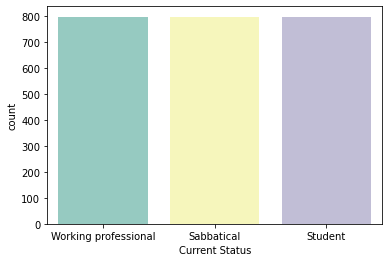

In [21]:
sns.countplot("Current Status", data = new_data_over,palette = "Set3")

In [22]:
new_data_over.drop(['City', 'Location (City Airport Code)','State', 'Zone','Latitude', 'Longitude'], axis=1, inplace = True)

In [23]:
features = ['Do you own multiple profiles on Instagram?','Gender','Highest Education','Phone OS']

In [24]:
new_numeric_data = pd.get_dummies(new_data_over, columns = features)

In [25]:
new_numeric_data.head()

,Age,Current Status,"How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)",How many posts do you have on Instagram?,Time Spent on Facebook in last week (in minutes),Time Spent on Facebook in last weekend (in minutes),Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),...,Do you own multiple profiles on Instagram?_yes,Gender_Female,Gender_Male,Gender_Non Binary,Highest Education_Graduation,Highest Education_High School,Highest Education_Post graduation,Phone OS_Android,Phone OS_Others,Phone OS_iOs
0,24,Working professional,456,20,0,0,770,400,900,120.0,...,0,1,0,0,1,0,0,0,0,1
1,39,Working professional,0,0,6000,2160,0,0,5000,2000.0,...,0,1,0,0,0,0,1,0,0,1
2,22,Working professional,400,6,500,2000,1000,1000,7000,2000.0,...,0,0,1,0,1,0,0,1,0,0
4,50,Working professional,0,0,1500,1500,0,0,2400,1300.0,...,0,0,1,0,1,0,0,0,0,1
5,25,Working professional,790,220,1000,1200,3000,840,2100,600.0,...,0,1,0,0,0,0,1,1,0,0


In [26]:
label_encoder = LabelEncoder()

In [27]:
new_numeric_data['Encoder_Current_Status']=label_encoder.fit_transform(new_numeric_data['Current Status'])

In [28]:
new_numeric_data.head()

,Age,Current Status,"How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)",How many posts do you have on Instagram?,Time Spent on Facebook in last week (in minutes),Time Spent on Facebook in last weekend (in minutes),Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),...,Gender_Female,Gender_Male,Gender_Non Binary,Highest Education_Graduation,Highest Education_High School,Highest Education_Post graduation,Phone OS_Android,Phone OS_Others,Phone OS_iOs,Encoder_Current_Status
0,24,Working professional,456,20,0,0,770,400,900,120.0,...,1,0,0,1,0,0,0,0,1,2
1,39,Working professional,0,0,6000,2160,0,0,5000,2000.0,...,1,0,0,0,0,1,0,0,1,2
2,22,Working professional,400,6,500,2000,1000,1000,7000,2000.0,...,0,1,0,1,0,0,1,0,0,2
4,50,Working professional,0,0,1500,1500,0,0,2400,1300.0,...,0,1,0,1,0,0,0,0,1,2
5,25,Working professional,790,220,1000,1200,3000,840,2100,600.0,...,1,0,0,0,0,1,1,0,0,2


In [29]:
new_numeric_data.drop('Current Status',axis=1,inplace=True)

In [30]:
x = new_numeric_data.drop("Encoder_Current_Status", axis=1).values
y = new_numeric_data["Encoder_Current_Status"]
y = y.astype(int)
print(x.shape)
print(y.shape)

(2388, 27)
(2388,)


In [31]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [32]:
fi_col=[]
fi = []

for i, column in enumerate(new_numeric_data.drop("Encoder_Current_Status", axis=1)):
    print("The feature importance for {} is : {}".format(column,dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Age is : 0.24995946950246256
The feature importance for How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum) is : 0.08798558129235487
The feature importance for How many posts do you have on Instagram? is : 0.06320463534869307
The feature importance for Time Spent on Facebook in last week (in minutes) is : 0.04644733815028323
The feature importance for Time Spent on Facebook in last weekend (in minutes) is : 0.037019839958188416
The feature importance for Time Spent on Instagram in last week (in minutes) is : 0.02437664028749719
The feature importance for Time Spent on Instagram in last weekend (in minutes) is : 0.04442555244861401
The feature importance for Time Spent on WhatsApp in last week (in minutes) is : 0.057174604964064034
The feature importance for Time Spent on WhatsApp in last weekend (in minutes) is : 0.0484364177977065
The feature importance for Total Facebook Usage is : 0.032853841

In [33]:
fi_col
fi 
fi_df=zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df, columns=["Features","Features_importance"])

In [34]:
fi_df=fi_df.sort_values("Features_importance", ascending=False).reset_index()

In [35]:
fi_df

,index,Features,Features_importance
0,0,Age,0.249959
1,1,How many followers do you have on Instagram? (...,0.087986
2,2,How many posts do you have on Instagram?,0.063205
3,11,Total Social Media Usage,0.060316
4,14,Total WhatsApp Usage,0.057175
5,7,Time Spent on WhatsApp in last week (in minutes),0.057175
6,10,Total Instagram Usage,0.054868
7,8,Time Spent on WhatsApp in last weekend (in min...,0.048436
8,13,Total Weekend Usage,0.047089
9,3,Time Spent on Facebook in last week (in minutes),0.046447


In [36]:
columns_to_keep=fi_df["Features"][0:23]
columns_to_keep

0                                                   Age
1     How many followers do you have on Instagram? (...
2              How many posts do you have on Instagram?
3                              Total Social Media Usage
4                                  Total WhatsApp Usage
5      Time Spent on WhatsApp in last week (in minutes)
6                                 Total Instagram Usage
7     Time Spent on WhatsApp in last weekend (in min...
8                                   Total Weekend Usage
9      Time Spent on Facebook in last week (in minutes)
10    Time Spent on Instagram in last weekend (in mi...
11                                     Total Week Usage
12    Time Spent on Facebook in last weekend (in min...
13                                 Total Facebook Usage
14    Time Spent on Instagram in last week (in minutes)
15                                        Gender_Female
16                         Highest Education_Graduation
17                    Highest Education_Post gra

In [37]:
x = new_numeric_data[columns_to_keep].values
y = new_numeric_data["Encoder_Current_Status"]
y = y.astype(int)
print(x.shape)
print(y.shape)

(2388, 23)
(2388,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [39]:
dt_clf = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)

In [40]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [41]:
y_pred=dt_clf.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.96      0.81       160
           1       0.85      0.79      0.82       159
           2       0.83      0.58      0.68       159

    accuracy                           0.78       478
   macro avg       0.79      0.78      0.77       478
weighted avg       0.79      0.78      0.77       478



In [43]:
r2_score(y_test, y_pred)

0.19748690000721392

In [44]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

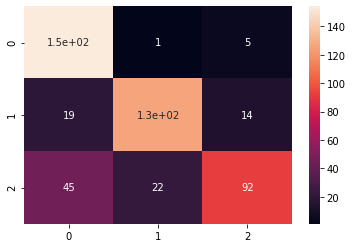

In [45]:

sns.heatmap(cm, annot=True)

# oversampling using SMOTE

In [46]:
x = new_numeric_data[columns_to_keep].values
y = new_numeric_data["Encoder_Current_Status"]
y = y.astype(int)
print(x.shape)
print(y.shape)

(2388, 23)
(2388,)


In [47]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(sampling_strategy='minority')
X,Y = smote.fit_resample(x,y)
Y.value_counts()

0    796
2    796
1    796
Name: Encoder_Current_Status, dtype: int64

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=Y)

In [52]:
dt_clf_over = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 15)

In [53]:
dt_clf_over.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=15)

In [54]:
prediction=dt_clf_over.predict(x_test)

In [55]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       160
           1       0.82      0.87      0.84       159
           2       0.87      0.60      0.71       159

    accuracy                           0.82       478
   macro avg       0.83      0.82      0.82       478
weighted avg       0.83      0.82      0.82       478

